<a href="https://colab.research.google.com/github/sabin5105/CIFAR10/blob/main/model/Cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [ ]:
(train_datas, train_labels), (test_datas, test_labels) = datasets.cifar10.load_data()

train_datas, test_datas = train_datas / 255, test_datas / 255

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [ ]:
from tensorflow.keras import losses, optimizers

model.compile(
    loss=losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(),
    metrics=["accuracy"],
)

model.fit(
    train_datas, train_labels,
    validation_data=(test_datas, test_labels),
    batch_size=256,
    epochs=10
)

Epoch 1/10
196/196 [==============================] - 69s 348ms/step - loss: 1.8706 - accuracy: 0.3079 - val_loss: 1.5482 - val_accuracy: 0.4367
Epoch 2/10
196/196 [==============================] - 67s 342ms/step - loss: 1.4173 - accuracy: 0.4894 - val_loss: 1.3971 - val_accuracy: 0.5001
Epoch 3/10
196/196 [==============================] - 69s 352ms/step - loss: 1.2830 - accuracy: 0.5420 - val_loss: 1.2183 - val_accuracy: 0.5636
Epoch 4/10
196/196 [==============================] - 66s 335ms/step - loss: 1.1870 - accuracy: 0.5796 - val_loss: 1.1632 - val_accuracy: 0.5878
Epoch 5/10
196/196 [==============================] - 71s 360ms/step - loss: 1.1053 - accuracy: 0.6108 - val_loss: 1.0602 - val_accuracy: 0.6249
Epoch 6/10
196/196 [==============================] - 64s 328ms/step - loss: 1.0356 - accuracy: 0.6373 - val_loss: 1.0478 - val_accuracy: 0.6308
Epoch 7/10
196/196 [==============================] - 66s 335ms/step - loss: 0.9914 - accuracy: 0.6539 - val_loss: 1.0150 - val_ac

In [ ]:
pred = model.predict(test_datas)

313/313 [==============================] - 5s 16ms/step


In [ ]:
# accuracy
from sklearn.metrics import *
import numpy as np

pred = np.argmax(pred, axis = 1)
print("Accuracy: ", accuracy_score(test_labels, pred))
print("F1 Score: ", f1_score(test_labels, pred, average='macro'))
print("Recall: ", recall_score(test_labels, pred, average='macro'))
print("Precision: ", precision_score(test_labels, pred, average='macro'))
print("-"*70)

Accuracy:  0.6751
F1 Score:  0.6753794087352817
Recall:  0.6751
Precision:  0.6865722539508263
----------------------------------------------------------------------


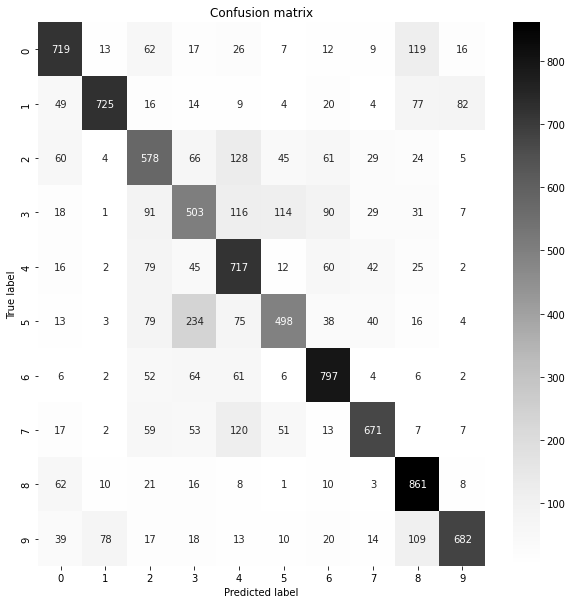

In [ ]:
# visualize confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(test_labels, pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d", cmap='Greys')
plt.title("Confusion matrix")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: ", classification_report(test_labels, pred))

Classification Report:                precision    recall  f1-score   support

           0       0.72      0.72      0.72      1000
           1       0.86      0.72      0.79      1000
           2       0.55      0.58      0.56      1000
           3       0.49      0.50      0.50      1000
           4       0.56      0.72      0.63      1000
           5       0.67      0.50      0.57      1000
           6       0.71      0.80      0.75      1000
           7       0.79      0.67      0.73      1000
           8       0.68      0.86      0.76      1000
           9       0.84      0.68      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.69      0.68      0.68     10000

